In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
fullnetflix = pd.read_csv("Netflix_data/netflix_base.csv")

In [3]:
happy2021 = pd.read_csv("Happiness/2021.csv")

In [4]:
internet = pd.read_csv("Internet/cities_internet_prices.19-10-2021.csv")
internet

,City,Region,Country,InternetPrice
0,Tirana,Tirana County,Albania,21.163960
1,Algiers,Algiers Province,Algeria,45.178261
2,Buenos Aires,NaN,Argentina,30.602425
3,La Plata,Buenos Aires Province,Argentina,40.296237
4,Cordoba,Cordoba Province,Argentina,25.158759
...,...,...,...,...
514,Caracas,Capital District,Venezuela,9.112500
515,Ho Chi Minh City,NaN,Vietnam,11.212581
516,Hanoi,NaN,Vietnam,9.935254
517,Harare,NaN,Zimbabwe,104.833333


In [5]:
avecountryinternetprice = internet.groupby(by=['Country']).mean()

In [6]:
avecountryinternetprice

,InternetPrice
Country,
Albania,21.163960
Algeria,45.178261
Argentina,29.413307
Armenia,17.685194
Australia,51.661288
...,...
Uruguay,32.340326
Uzbekistan,33.555714
Venezuela,9.112500


In [7]:
happy2021.rename(columns={'Country name':'Country'}, inplace=True)
happy2021

,Country,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205


In [8]:
happyinternet = pd.merge(happy2021,avecountryinternetprice,how='inner',on='Country')
happyinternet

,Country,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,...,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,InternetPrice
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,...,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253,22.716460
1,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,...,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839,60.225593
2,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,...,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967,67.094301
3,Norway,Western Europe,7.392,0.035,7.462,7.323,11.053,0.954,73.300,0.960,...,0.270,2.43,1.543,1.108,0.782,0.703,0.249,0.427,2.580,48.812149
4,Sweden,Western Europe,7.363,0.036,7.433,7.293,10.867,0.934,72.700,0.945,...,0.237,2.43,1.478,1.062,0.763,0.685,0.244,0.448,2.683,31.127907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Egypt,Middle East and North Africa,4.283,0.045,4.371,4.195,9.367,0.750,61.998,0.749,...,0.795,2.43,0.954,0.647,0.426,0.446,0.069,0.092,1.648,27.502503
96,India,South Asia,3.819,0.026,3.869,3.769,8.755,0.603,60.633,0.893,...,0.774,2.43,0.741,0.316,0.383,0.622,0.246,0.106,1.405,10.504102
97,Tanzania,Sub-Saharan Africa,3.623,0.071,3.762,3.485,7.876,0.702,57.999,0.833,...,0.577,2.43,0.433,0.540,0.300,0.549,0.307,0.231,1.263,72.665630
98,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,...,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648,73.688531


In [26]:
slope, intercept, r, p, se = st.linregress(happyinternet['Ladder score'], happyinternet['InternetPrice'])
print(f"The correlation between Happiness Index and Internet Price is {round(r,4)}.")
line_eq= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

The correlation between Happiness Index and Internet Price is 0.0247.


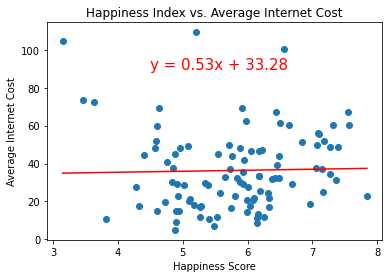

In [28]:
#Scatter and Linear Regression on Happiness Index vs Internet Price
plt.scatter(happyinternet['Ladder score'],happyinternet['InternetPrice'])
plt.xlabel("Happiness Score")
plt.ylabel("Average Internet Cost")
plt.title("Happiness Index vs. Average Internet Cost")
plt.annotate(line_eq,(4.5,90),fontsize=15,color='red')
plt.plot(happyinternet['Ladder score'], intercept + slope*happyinternet['Ladder score'], color='r', label='fitted line')
plt.show()

In [1]:
print("We can conclude that there is relatively no correlation between the happiness index and the cost of internet")
print("However, the actual correlation will be slightly higher than shown given a few outliers that do not fit the rest of the data")

We can conclude that there is relatively no correlation between the happiness index and the cost of internet
However, the actual correlation will be slightly higher than shown given a few outliers that do not fit the rest of the data
